In [3]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import dates

import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from matplotlib.dates import DateFormatter
import time



cw = pd.read_csv('ged191.csv')

#Drop unwanted columns 

drop_these = ['id','low', 'high', 'event_clarity', 'date_prec', 'conflict_new_id', 
              'conflict_name','dyad_name', 'dyad_new_id','side_a_new_id','adm_1','adm_2', 'gwnoa', 'side_b_new_id', 'dyad_new_id', 'gwnob', 'number_of_sources'
              , 'source_headline', 'priogrid_gid', 'source_date', 'source_office', 'source_article', 
              'source_original', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start', 
              'date_end', 'country_id', 'side_a', 'side_b', 'where_prec', 'type_of_violence', 'active_year']


cw.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made


cw_year = cw[cw.year == 2018]



In [4]:
# I create dummy variables for regions:
region_dummy = pd.get_dummies(cw_year['region'])
# I merge the two dataframes:
cw_year = pd.concat([cw_year, region_dummy], axis=1)
cw_year.head()


,year,where_coordinates,latitude,longitude,geom_wkt,country,region,best,Africa,Americas,Asia,Europe,Middle East
2010,2018,Qush Tepa district,36.193552,65.352724,POINT (65.352724 36.193552),Afghanistan,Asia,45,0,0,1,0,0
2011,2018,Imam Sahib district,37.105713,68.851658,POINT (68.851658 37.105713),Afghanistan,Asia,28,0,0,1,0,0
2012,2018,Bala Bagh village,34.389900,70.227900,POINT (70.227900 34.389900),Afghanistan,Asia,7,0,0,1,0,0
2013,2018,Khaki Safed district,32.755167,62.073124,POINT (62.073124 32.755167),Afghanistan,Asia,23,0,0,1,0,0
2014,2018,Khwaja Sabz Posh district,36.055429,64.978235,POINT (64.978235 36.055429),Afghanistan,Asia,16,0,0,1,0,0


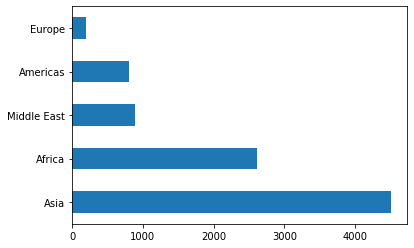

In [5]:

cw_year['region'].value_counts()

Asia = cw_year['region'].value_counts().plot(kind='barh')



ValueError: x must be a label or position

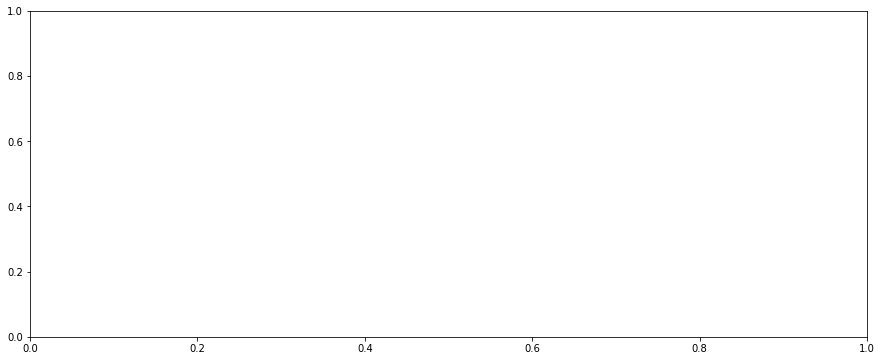

In [ ]:
print(5)


In [ ]:
cw_year['country'].value_counts().plot()

In [9]:
#Making the geografical map

import geopandas as gpd
shapefile = 'Overvægtige/DATA/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

import json
#Read data to json.
cw_year_grouped_json = json.loads(cw_year_grouped.to_json())
#Convert to String like object.
json_data = json.dumps(cw_year_grouped_json)


        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [ ]:
cw_year['country'].value_counts()

In [8]:
# Grouping by 'Date' I can make a timeline plotting number of outbreaks pr. day:
grouped = cw_year.groupby('country')

cw_year_count = grouped.count()
cw_year_grouped = grouped.sum()

cw_year_grouped['Armed conflicts'] = cw_year_count['best']
cw_year_grouped.reset_index(inplace=True)

print('Countries:', len(cw_year_grouped))
cw_year_grouped.head(5)

Countries: 56


,country,year,latitude,longitude,best,Africa,Americas,Asia,Europe,Middle East,Armed conflicts
0,Afghanistan,7510996,126886.348193,250988.722889,26888,0.0,0.0,3722.0,0.0,0.0,3722
1,Algeria,20180,348.247775,45.884229,35,10.0,0.0,0.0,0.0,0.0,10
2,Angola,12108,-47.908549,101.475650,24,6.0,0.0,0.0,0.0,0.0,6
3,Armenia,2018,40.854687,45.577810,1,0.0,0.0,0.0,1.0,0.0,1
4,Australia,4036,-75.627222,289.926112,2,0.0,0.0,2.0,0.0,0.0,2


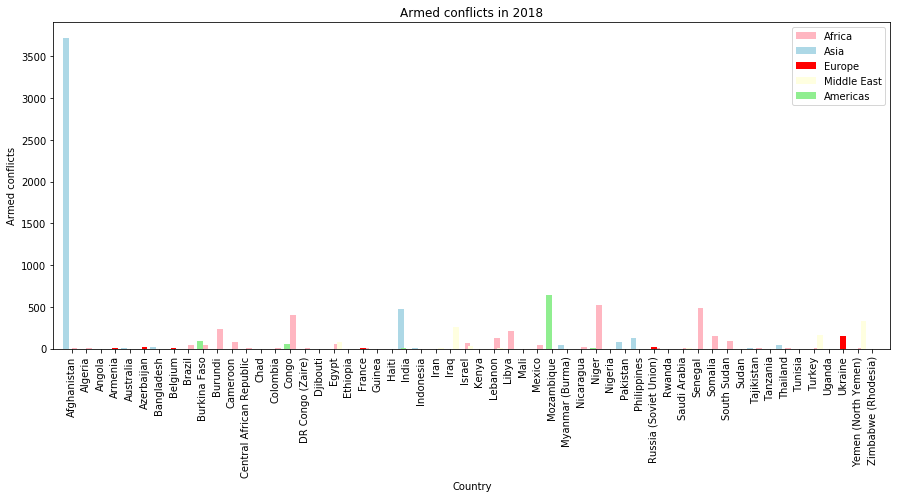

In [10]:
fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year_grouped.plot(x="country", y=["Africa" , "Asia", "Europe", "Middle East", "Americas"], kind="bar", color=['lightpink', 'lightblue', 'red' , 'lightyellow', 'lightgreen'], width=2, ax=ax)

x = cw_year_grouped['country']

plt.title('Armed conflicts in 2018')
plt.ylabel('Armed conflicts')
plt.xlabel('Country')

plt.show()

In [11]:
# join the geodataframe with the csv dataframe
merged = gdf.merge(cw_year_grouped, how='right', left_on="country", right_on="country")
merged = merged[['country', 'geometry', 'best' ]]

merged.head()


,country,geometry,best
0,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",32
1,Somalia,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",2447
2,Kenya,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",149
3,Sudan,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",455
4,Chad,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",168


In [33]:
import json

#Read data to json
merged_json = json.loads(merged.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)


RecursionError: maximum recursion depth exceeded

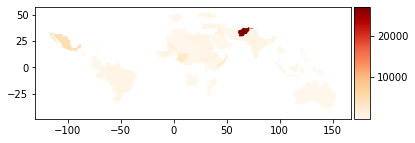

<Figure size 1200x800 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)


from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
cax = divider.append_axes("right", size="5%", pad=0.05)
    
merged.plot(column=merged['best'], ax=ax, cax = cax, legend = True, cmap='OrRd',figsize=(15, 10));



In [56]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000)
#Define custom tick labels for color bar.
tick_labels = {'0': '0', '50': '50', '100':'100', '500':'500', '1000':'1000', '2000':'2000', '3000':'3000'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'best', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)


Loading BokehJS ...